In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [3]:
# Segmentation of customers by telecommunication provider based on usage patterns, categorizing customers into four groups.
# Goal: Need to build a model to predict class of new or unknown case
# Customer category groups:
  ## 1. Basic service, 2. e-service, 3. plus service, 4. Total service

In [4]:
# Load data
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

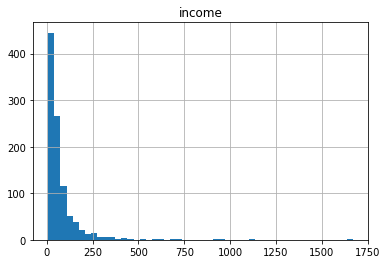

In [5]:
# Customer volume in each category
df['custcat'].value_counts()
# Histogram
df.hist(column='income', bins=50)

In [6]:
# Feature set engineering
df.columns
# Converting Pandas data frame to Numpy array
## Building feature set
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
X[0:5]
## Building label set
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [7]:
# Data Normalization
## Data standardization give data zero mean and unit variance. Must needed especially for algorithms such as KNN which is based on distance of cases.
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [8]:
# Train/Test Split (Mutually exclusive)
## Model needs high out-of-sample accuracy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [9]:
# Build K nearest neighbor (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier
## Let's start algorithm with k = 4
# Train model and predict
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh
## Using this model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [10]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [11]:
# how about metrics with k = 6
# Build K nearest neighbor (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier
## Let's start algorithm with k = 6
# Train model and predict
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh
## Using this model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
The best accuracy was with 0.34 with k= 9


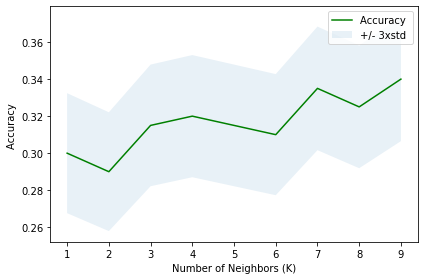

In [12]:
# How can we choose a good k value ?
## Good solution is to reserve a part of your data for testing accuracy of the model.
## Choose k = 1, use training part of modeling and calculate the accuracy of prediction
## Repeat the process by increasing k value
Ks =10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx =[];
for n in range(1, Ks):
    # Train Model and Predict
  neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  yhat = neigh.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)

## Plotting Model accuracy for different number of Neighbors
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10 )
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

## Best accuracy
print("The best accuracy was with", mean_acc.max(),
      "with k=", mean_acc.argmax()+1)

In [19]:
# Testing with k = 9
# Build K nearest neighbor (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier
## Let's start algorithm with k = 9
# Train model and predict
k = 9
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh
## Using this model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:5]
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5025
Test set Accuracy:  0.34


In [79]:
from sklearn.metrics import silhouette_score#
from sklearn.cluster import DBSCAN# Prepare models
kmeans = KMeans(n_clusters=9).fit(df)
normalized_vectors = preprocessing.normalize(df)
normalized_kmeans = KMeans(n_clusters=9).fit(normalized_vectors)
min_samples = df.shape[1]+1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(df)# Print results
print('kmeans: {}'.format(silhouette_score(df, kmeans.labels_,
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))

kmeans: 0.32201330782590104
Cosine kmeans:0.40225159086353063
